In [3]:
!wget https://www.shutterstock.com/image-illustration/top-view-sports-car-600nw-2285972677.jpg -O car.jpg

--2025-07-08 07:37:25--  https://www.shutterstock.com/image-illustration/top-view-sports-car-600nw-2285972677.jpg
Resolving www.shutterstock.com (www.shutterstock.com)... 13.226.204.23, 13.226.204.101, 13.226.204.90, ...
Connecting to www.shutterstock.com (www.shutterstock.com)|13.226.204.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30831 (30K) [image/jpeg]
Saving to: ‘car.jpg’

car.jpg             100%[===================>]  30.11K  --.-KB/s    in 0s      

2025-07-08 07:37:25 (146 MB/s) - ‘car.jpg’ saved [30831/30831]



In [4]:
!wget https://thumbs.dreamstime.com/b/car-parking-lot-road-markings-numbering-spaces-empty-pedestrian-crossing-top-view-d-render-153672294.jpg -O parking_lot.jpg

--2025-07-08 07:37:33--  https://thumbs.dreamstime.com/b/car-parking-lot-road-markings-numbering-spaces-empty-pedestrian-crossing-top-view-d-render-153672294.jpg
Resolving thumbs.dreamstime.com (thumbs.dreamstime.com)... 151.101.129.91, 151.101.1.91, 151.101.193.91, ...
Connecting to thumbs.dreamstime.com (thumbs.dreamstime.com)|151.101.129.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64777 (63K) [image/jpeg]
Saving to: ‘parking_lot.jpg’

parking_lot.jpg     100%[===================>]  63.26K  --.-KB/s    in 0.02s   

2025-07-08 07:37:34 (2.56 MB/s) - ‘parking_lot.jpg’ saved [64777/64777]



🚗 PARKING LOT SIMULATION WITH TIME SLIDER
This will:
1. Run a complete 2000-step simulation
2. Create an interactive visualization with time slider
3. Show queue lengths and occupancy over time

🚀 Starting...
🚀 Running full simulation for 2000 steps...
This may take a moment...
Progress: 0% - Step 0/2000
Progress: 5% - Step 100/2000
Progress: 10% - Step 200/2000
Progress: 15% - Step 300/2000
Progress: 20% - Step 400/2000
Progress: 25% - Step 500/2000
Progress: 30% - Step 600/2000
Progress: 35% - Step 700/2000
Progress: 40% - Step 800/2000
Progress: 45% - Step 900/2000
Progress: 50% - Step 1000/2000
Progress: 55% - Step 1100/2000
Progress: 60% - Step 1200/2000
Progress: 65% - Step 1300/2000
Progress: 70% - Step 1400/2000
Progress: 75% - Step 1500/2000
Progress: 80% - Step 1600/2000
Progress: 85% - Step 1700/2000
Progress: 90% - Step 1800/2000
Progress: 95% - Step 1900/2000
✅ Simulation complete!
📊 Final Statistics:
   Total cars processed: 99
   Cars parked: 61
   Cars left: 38
   Final

/var/folders/w8/xz590jyd7r36zmxcspgzj3z40000gn/T/ipykernel_83884/850587280.py:395: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  slider = Slider(ax_slider, 'Time Step', 0, len(all_states)-1,
/var/folders/w8/xz590jyd7r36zmxcspgzj3z40000gn/T/ipykernel_83884/850587280.py:530: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  plt.draw()
/var/folders/w8/xz590jyd7r36zmxcspgzj3z40000gn/T/ipykernel_83884/850587280.py:542: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/krishna/courses/CE397-Scientific-MachineLearning/utp-sciml/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


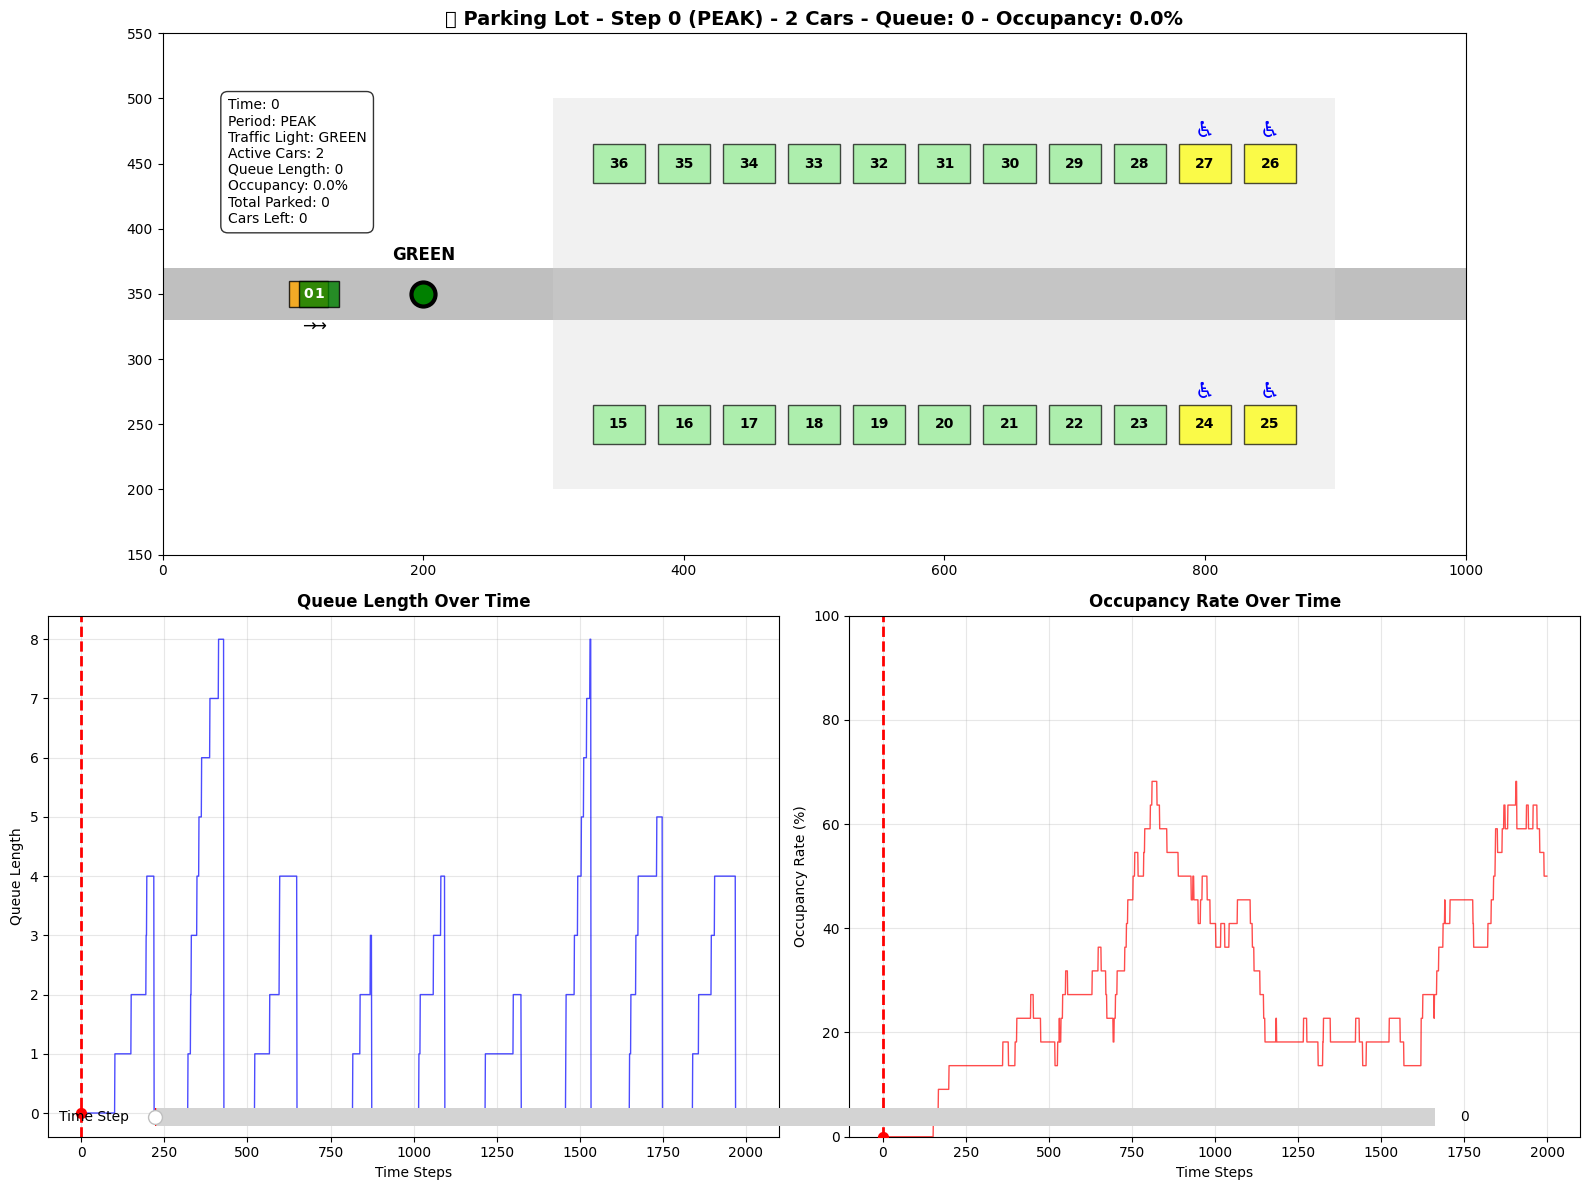


✅ Complete! Use the slider to explore the simulation timeline.


In [ ]:
import pygame
import numpy as np
import random
import math
import time
from collections import deque
from enum import Enum
import matplotlib.pyplot as plt
from threading import Thread
import sys

# Initialize Pygame
pygame.init()

# Constants
SCREEN_WIDTH = 1200
SCREEN_HEIGHT = 700
FPS = 30

# Colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
RED = (255, 0, 0)
GREEN = (0, 255, 0)
BLUE = (0, 0, 255)
YELLOW = (255, 255, 0)
GRAY = (128, 128, 128)
LIGHT_GRAY = (200, 200, 200)
DARK_GRAY = (64, 64, 64)
ORANGE = (255, 165, 0)
PURPLE = (128, 0, 128)
CYAN = (0, 255, 255)
PINK = (255, 192, 203)
BROWN = (139, 69, 19)

class TrafficLightState(Enum):
    RED = 0
    YELLOW = 1
    GREEN = 2

class CarState(Enum):
    APPROACHING = 0
    WAITING = 1
    ENTERING = 2
    SEARCHING = 3
    PARKING = 4
    PARKED = 5
    LEAVING = 6

class Car:
    def __init__(self, car_id, arrival_time):
        self.id = car_id
        self.arrival_time = arrival_time
        self.state = CarState.APPROACHING
        self.x = 50  # Start from left side
        self.y = 350  # Middle of screen
        self.target_x = 0
        self.target_y = 0
        self.speed = 2.0
        self.parking_spot = None
        self.park_duration = random.randint(100, 300)  # Frames to stay parked
        self.parked_time = 0
        self.color = random.choice([RED, BLUE, GREEN, ORANGE, PURPLE, CYAN, PINK, BROWN])
        self.search_attempts = 0
        self.max_search_attempts = 200
        self.width = 30
        self.height = 20

    def update(self, parking_lot):
        if self.state == CarState.APPROACHING:
            self.x += self.speed
            if self.x >= 180:  # Near traffic light
                if parking_lot.traffic_light.state == TrafficLightState.GREEN:
                    self.state = CarState.ENTERING
                else:
                    self.state = CarState.WAITING
                    self.x = 180
        
        elif self.state == CarState.WAITING:
            # Small jitter while waiting
            self.x = 180 + random.uniform(-2, 2)
            if parking_lot.traffic_light.state == TrafficLightState.GREEN:
                self.state = CarState.ENTERING
        
        elif self.state == CarState.ENTERING:
            self.x += self.speed
            if self.x >= 280:  # Inside parking lot
                self.state = CarState.SEARCHING
                # Choose initial search target
                self.target_x = random.randint(350, 900)
                self.target_y = random.choice([250, 450])  # Top or bottom row
        
        elif self.state == CarState.SEARCHING:
            self.search_attempts += 1
            
            # Move towards target
            dx = self.target_x - self.x
            dy = self.target_y - self.y
            
            if abs(dx) > 3:
                self.x += np.sign(dx) * self.speed
            if abs(dy) > 3:
                self.y += np.sign(dy) * self.speed
            
            # Look for parking spot when near target
            if abs(dx) < 30 and abs(dy) < 30:
                spot = parking_lot.find_available_spot_near(self.x, self.y)
                if spot:
                    self.parking_spot = spot
                    self.target_x, self.target_y = spot
                    self.state = CarState.PARKING
                    parking_lot.occupy_spot(spot)
                else:
                    # No spots available, try another area or leave
                    if self.search_attempts > self.max_search_attempts or random.random() < 0.02:
                        self.state = CarState.LEAVING
                        self.target_x = 50
                        self.target_y = 350
                    else:
                        # Try another area
                        self.target_x = random.randint(350, 900)
                        self.target_y = random.choice([250, 450])
        
        elif self.state == CarState.PARKING:
            # Move to exact parking spot
            dx = self.target_x - self.x
            dy = self.target_y - self.y
            
            if abs(dx) > 1:
                self.x += np.sign(dx) * min(1, abs(dx))
            if abs(dy) > 1:
                self.y += np.sign(dy) * min(1, abs(dy))
            
            if abs(dx) < 2 and abs(dy) < 2:
                self.state = CarState.PARKED
                self.x = self.target_x
                self.y = self.target_y
        
        elif self.state == CarState.PARKED:
            self.parked_time += 1
            if self.parked_time >= self.park_duration:
                self.state = CarState.LEAVING
                self.target_x = 50
                self.target_y = 350
                if self.parking_spot:
                    parking_lot.free_spot(self.parking_spot)
        
        elif self.state == CarState.LEAVING:
            dx = self.target_x - self.x
            dy = self.target_y - self.y
            
            if abs(dx) > 2:
                self.x += np.sign(dx) * self.speed
            if abs(dy) > 2:
                self.y += np.sign(dy) * self.speed

    def draw(self, screen, font):
        # Draw car body
        car_rect = pygame.Rect(self.x - self.width//2, self.y - self.height//2, 
                              self.width, self.height)
        pygame.draw.rect(screen, self.color, car_rect)
        pygame.draw.rect(screen, BLACK, car_rect, 2)
        
        # Draw windows
        window_rect = pygame.Rect(self.x - self.width//2 + 3, self.y - self.height//2 + 3, 
                                 self.width - 6, self.height - 6)
        pygame.draw.rect(screen, CYAN, window_rect)
        
        # Draw car ID
        id_text = font.render(str(self.id), True, BLACK)
        screen.blit(id_text, (self.x - 8, self.y - 8))
        
        # Draw state indicator
        state_symbols = {
            CarState.APPROACHING: '→',
            CarState.WAITING: '⏹',
            CarState.ENTERING: '↗',
            CarState.SEARCHING: '🔍',
            CarState.PARKING: '⬇',
            CarState.PARKED: '🅿',
            CarState.LEAVING: '←'
        }
        symbol = state_symbols.get(self.state, '?')
        symbol_text = font.render(symbol, True, BLACK)
        screen.blit(symbol_text, (self.x - 10, self.y - 35))

class TrafficLight:
    def __init__(self):
        self.state = TrafficLightState.GREEN
        self.timer = 0
        self.red_duration = 120    # 4 seconds at 30 FPS
        self.yellow_duration = 30  # 1 second
        self.green_duration = 90   # 3 seconds
        self.x = 200
        self.y = 300
        
    def update(self, queue_length):
        self.timer += 1
        
        # Adaptive timing based on queue length
        green_duration = max(60, min(180, self.green_duration + queue_length * 10))
        red_duration = max(90, min(240, self.red_duration - queue_length * 5))
        
        if self.state == TrafficLightState.RED and self.timer >= red_duration:
            self.state = TrafficLightState.GREEN
            self.timer = 0
        elif self.state == TrafficLightState.GREEN and self.timer >= green_duration:
            self.state = TrafficLightState.YELLOW
            self.timer = 0
        elif self.state == TrafficLightState.YELLOW and self.timer >= self.yellow_duration:
            self.state = TrafficLightState.RED
            self.timer = 0

    def draw(self, screen, font):
        # Draw pole
        pygame.draw.rect(screen, DARK_GRAY, (self.x - 5, self.y, 10, 100))
        
        # Draw light housing
        light_rect = pygame.Rect(self.x - 20, self.y - 30, 40, 60)
        pygame.draw.rect(screen, BLACK, light_rect)
        
        # Draw lights
        red_pos = (self.x, self.y - 15)
        yellow_pos = (self.x, self.y)
        green_pos = (self.x, self.y + 15)
        
        # All lights dim
        pygame.draw.circle(screen, (100, 0, 0), red_pos, 8)
        pygame.draw.circle(screen, (100, 100, 0), yellow_pos, 8)
        pygame.draw.circle(screen, (0, 100, 0), green_pos, 8)
        
        # Active light bright
        if self.state == TrafficLightState.RED:
            pygame.draw.circle(screen, RED, red_pos, 8)
        elif self.state == TrafficLightState.YELLOW:
            pygame.draw.circle(screen, YELLOW, yellow_pos, 8)
        elif self.state == TrafficLightState.GREEN:
            pygame.draw.circle(screen, GREEN, green_pos, 8)
        
        # State text
        state_text = font.render(self.state.name, True, BLACK)
        screen.blit(state_text, (self.x - 25, self.y + 40))

class ParkingLot:
    def __init__(self):
        self.traffic_light = TrafficLight()
        self.cars = []
        self.time_step = 0
        self.arrival_rate = 0.02  # Probability per frame
        self.car_id_counter = 0
        
        # Create parking spots based on the original image layout
        self.parking_spots = {}
        self.occupied_spots = set()
        
        # Top row (spots 15-25)
        for i in range(15, 26):
            x = 350 + (i - 15) * 50
            y = 250
            self.parking_spots[(x, y)] = f"{i}"
        
        # Bottom row (spots 26-36, reverse order like in image)
        for i in range(26, 37):
            x = 350 + (36 - i) * 50
            y = 450
            self.parking_spots[(x, y)] = f"{i}"
        
        # Mark disabled spots (last two in each row)
        self.disabled_spots = {(800, 250), (850, 250), (800, 450), (850, 450)}
        
        # Statistics
        self.cars_entered = 0
        self.cars_parked = 0
        self.cars_left = 0
        self.queue_lengths = deque(maxlen=500)  # Keep last 500 measurements
        self.occupancy_history = deque(maxlen=500)
        self.time_history = deque(maxlen=500)
        
        # Load images if available
        self.background_img = None
        self.car_img = None
        
        try:
            self.background_img = pygame.image.load('parking_lot.jpg')
            self.background_img = pygame.transform.scale(self.background_img, (SCREEN_WIDTH, SCREEN_HEIGHT))
            print("✅ Loaded parking_lot.jpg")
        except:
            print("⚠️ Could not load parking_lot.jpg - using drawn background")
            
        try:
            self.car_img = pygame.image.load('car.jpg')
            self.car_img = pygame.transform.scale(self.car_img, (30, 20))
            print("✅ Loaded car.jpg")
        except:
            print("⚠️ Could not load car.jpg - using drawn cars")
        
        # Start with some initial cars
        for i in range(2):
            car = Car(self.car_id_counter, 0)
            car.x = random.randint(60, 120)
            self.cars.append(car)
            self.car_id_counter += 1

    def find_available_spot_near(self, x, y):
        """Find available parking spot nearest to given coordinates"""
        available = [(spot, self.distance(spot, (x, y))) for spot in self.parking_spots.keys() 
                    if spot not in self.occupied_spots]
        if available:
            available.sort(key=lambda x: x[1])
            return available[0][0]
        return None
    
    def distance(self, spot1, spot2):
        return math.sqrt((spot1[0] - spot2[0])**2 + (spot1[1] - spot2[1])**2)
    
    def occupy_spot(self, spot):
        self.occupied_spots.add(spot)
        self.cars_parked += 1
    
    def free_spot(self, spot):
        if spot in self.occupied_spots:
            self.occupied_spots.remove(spot)
    
    def get_queue_length(self):
        return len([car for car in self.cars if car.state == CarState.WAITING])
    
    def update(self):
        self.time_step += 1
        
        # Generate new cars with peak/off-peak patterns
        time_cycle = (self.time_step % 1800) / 1800  # 1 minute cycle at 30 FPS
        if time_cycle < 0.3 or time_cycle > 0.7:  # Peak hours
            arrival_rate = self.arrival_rate * 2.5
        else:  # Off-peak
            arrival_rate = self.arrival_rate * 0.8
            
        if random.random() < arrival_rate:
            new_car = Car(self.car_id_counter, self.time_step)
            self.cars.append(new_car)
            self.car_id_counter += 1
        
        # Update traffic light
        queue_length = self.get_queue_length()
        self.traffic_light.update(queue_length)
        
        # Record statistics
        self.queue_lengths.append(queue_length)
        occupancy_rate = len(self.occupied_spots) / len(self.parking_spots) * 100
        self.occupancy_history.append(occupancy_rate)
        self.time_history.append(self.time_step)
        
        # Update cars
        cars_to_remove = []
        for car in self.cars:
            car.update(self)
            # Remove cars that have left
            if car.state == CarState.LEAVING and car.x < 60:
                cars_to_remove.append(car)
                self.cars_left += 1
        
        for car in cars_to_remove:
            self.cars.remove(car)

    def draw(self, screen, font, large_font):
        # Draw background
        if self.background_img:
            screen.blit(self.background_img, (0, 0))
        else:
            screen.fill(LIGHT_GRAY)
            
            # Draw road
            pygame.draw.rect(screen, DARK_GRAY, (0, 330, SCREEN_WIDTH, 40))
            
            # Draw lane markings
            for x in range(0, SCREEN_WIDTH, 60):
                pygame.draw.rect(screen, WHITE, (x, 345, 30, 5))
            
            # Draw parking lot area
            pygame.draw.rect(screen, GRAY, (300, 200, 600, 300))
            pygame.draw.rect(screen, BLACK, (300, 200, 600, 300), 3)
        
        # Draw parking spots
        for (x, y), spot_id in self.parking_spots.items():
            # Determine spot color
            if (x, y) in self.occupied_spots:
                color = RED
            elif (x, y) in self.disabled_spots:
                color = YELLOW
            else:
                color = GREEN
            
            # Draw parking spot rectangle
            spot_rect = pygame.Rect(x - 20, y - 15, 40, 30)
            pygame.draw.rect(screen, color, spot_rect)
            pygame.draw.rect(screen, BLACK, spot_rect, 2)
            
            # Draw spot number
            spot_text = font.render(spot_id, True, BLACK)
            text_rect = spot_text.get_rect(center=(x, y))
            screen.blit(spot_text, text_rect)
            
            # Draw wheelchair symbol for disabled spots
            if (x, y) in self.disabled_spots:
                wheelchair_text = large_font.render('♿', True, BLUE)
                wheelchair_rect = wheelchair_text.get_rect(center=(x, y + 25))
                screen.blit(wheelchair_text, wheelchair_rect)
        
        # Draw traffic light
        self.traffic_light.draw(screen, font)
        
        # Draw cars
        for car in self.cars:
            if self.car_img and car.state != CarState.PARKED:  # Use image for moving cars
                car_rect = self.car_img.get_rect(center=(int(car.x), int(car.y)))
                screen.blit(self.car_img, car_rect)
            else:
                car.draw(screen, font)
        
        # Draw statistics
        occupancy_rate = len(self.occupied_spots) / len(self.parking_spots) * 100
        queue_length = self.get_queue_length()
        total_cars = len(self.cars)
        
        # Determine current period
        time_cycle = (self.time_step % 1800) / 1800
        period = "PEAK HOURS" if (time_cycle < 0.3 or time_cycle > 0.7) else "OFF-PEAK"
        
        stats = [
            f"Time: {self.time_step}",
            f"Period: {period}",
            f"Traffic Light: {self.traffic_light.state.name}",
            f"Queue Length: {queue_length}",
            f"Active Cars: {total_cars}",
            f"Occupancy: {occupancy_rate:.1f}%",
            f"Cars Parked: {self.cars_parked}",
            f"Cars Left: {self.cars_left}"
        ]
        
        # Draw stats box
        stats_rect = pygame.Rect(10, 10, 250, 200)
        pygame.draw.rect(screen, WHITE, stats_rect)
        pygame.draw.rect(screen, BLACK, stats_rect, 2)
        
        for i, stat in enumerate(stats):
            stat_text = font.render(stat, True, BLACK)
            screen.blit(stat_text, (20, 20 + i * 22))

def update_plot(parking_lot):
    """Update matplotlib plot with queue length data"""
    if len(parking_lot.queue_lengths) < 10:
        return
    
    plt.clf()
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    
    # Queue length plot
    time_data = list(parking_lot.time_history)[-300:]  # Last 300 points
    queue_data = list(parking_lot.queue_lengths)[-300:]
    
    ax1.plot(time_data, queue_data, 'b-', linewidth=2, label='Queue Length')
    ax1.fill_between(time_data, queue_data, alpha=0.3, color='blue')
    ax1.set_ylabel('Queue Length')
    ax1.set_title('Traffic Control Performance')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Occupancy rate plot
    occupancy_data = list(parking_lot.occupancy_history)[-300:]
    ax2.plot(time_data, occupancy_data, 'r-', linewidth=2, label='Occupancy %')
    ax2.fill_between(time_data, occupancy_data, alpha=0.3, color='red')
    ax2.set_ylabel('Occupancy Rate (%)')
    ax2.set_xlabel('Time Steps')
    ax2.set_ylim(0, 100)
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    plt.tight_layout()
    plt.pause(0.01)

def run_simulation():
    """Main simulation loop"""
    screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
    pygame.display.set_caption("🚗 Parking Lot Traffic Control Simulation")
    clock = pygame.time.Clock()
    
    # Fonts
    font = pygame.font.Font(None, 24)
    large_font = pygame.font.Font(None, 48)
    
    # Create parking lot
    parking_lot = ParkingLot()
    
    # Setup matplotlib for live plotting
    plt.ion()
    plt.figure(figsize=(10, 8))
    
    print("🚗 Pygame Parking Lot Simulation Started!")
    print("Controls:")
    print("  ESC or close window to quit")
    print("  Space to pause/unpause")
    print("📊 Real-time plots will update in separate window")
    
    running = True
    paused = False
    frame_count = 0
    
    while running:
        # Handle events
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
            elif event.type == pygame.KEYDOWN:
                if event.key == pygame.K_ESCAPE:
                    running = False
                elif event.key == pygame.K_SPACE:
                    paused = not paused
                    print(f"Simulation {'PAUSED' if paused else 'RESUMED'}")
        
        if not paused:
            # Update simulation
            parking_lot.update()
            
            # Update plot every 30 frames (1 second)
            if frame_count % 30 == 0:
                try:
                    update_plot(parking_lot)
                except Exception as e:
                    print(f"Plot update error: {e}")
        
        # Draw everything
        parking_lot.draw(screen, font, large_font)
        
        # Draw pause indicator
        if paused:
            pause_text = large_font.render("PAUSED", True, RED)
            pause_rect = pause_text.get_rect(center=(SCREEN_WIDTH//2, SCREEN_HEIGHT//2))
            pygame.draw.rect(screen, WHITE, pause_rect.inflate(20, 10))
            pygame.draw.rect(screen, BLACK, pause_rect.inflate(20, 10), 3)
            screen.blit(pause_text, pause_rect)
        
        # Update display
        pygame.display.flip()
        clock.tick(FPS)
        frame_count += 1
    
    # Cleanup
    pygame.quit()
    plt.ioff()
    plt.show()  # Keep final plot open
    print("👋 Simulation ended!")

if __name__ == "__main__":
    print("🎮 PYGAME PARKING LOT SIMULATION")
    print("=" * 50)
    print("Features:")
    print("✅ Smooth real-time animation")
    print("✅ Uses parking_lot.jpg and car.jpg if available")
    print("✅ Adaptive traffic light control")
    print("✅ Live matplotlib plotting of queue lengths")
    print("✅ Peak vs off-peak traffic patterns")
    print("✅ Interactive controls (Space to pause, ESC to quit)")
    print("\n🚀 Starting simulation...")
    
    try:
        run_simulation()
    except KeyboardInterrupt:
        print("\n👋 Simulation interrupted by user")
    except Exception as e:
        print(f"❌ Error: {e}")
        print("Make sure pygame and matplotlib are installed:")
        print("pip install pygame matplotlib")